In [ ]:
import numpy as np
import pandas as pd
import re #regular expression
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
df=pd.read_csv("/content/twitter_validation.csv",encoding="ISO-8859-1")   #encoding these used for emojies and other numbers
df.columns=['id','location','target','text']
df


,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.head()

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [ ]:
df.tail()

,id,location,target,text
994,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [ ]:
df.shape

(999, 4)

In [ ]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [ ]:
df['location'].value_counts()


RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


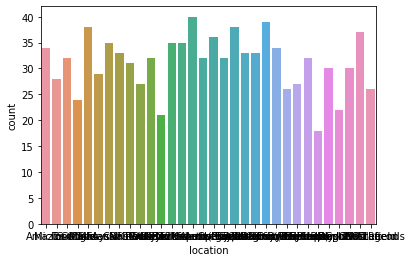

In [ ]:
sns.countplot(x='location',data=df)

In [ ]:
df['target'].value_counts()
df

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


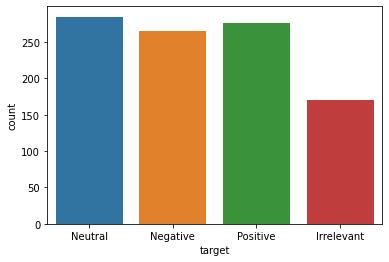

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
#drop Irrelevent
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True) #axis=o means removing column
df


,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
992,314,Amazon,Negative,Please explain how this is possible! How can t...
993,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#Reset Index 
df.reset_index(drop=True,inplace=True)
df



,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.shape

(828, 4)

In [ ]:
df.drop(['id','location'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df['target']=df['target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
nltk.download('wordnet')
nltk.download('stropword')
nltk.download('punket')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading stropword: Package 'stropword' not found in
[nltk_data]     index
[nltk_data] Error loading punket: Package 'punket' not found in index


False

In [ ]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
#remove special charecters
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ') #regular expression
tweets

<ipython-input-83-b757552b115c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ') #regular expression


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
#len above >==3 tokenze
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x)]))
tweets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why do I pay for WORD when it functi...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826      Bought a fraction of Microsoft today Small wins
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
#applying stemmer 
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
sb=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[sb.stem(i.lower()) for i in tk.tokenize(x)]).apply (lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
data=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in data]).apply(lambda x:' '.join(x))
tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
ve=TfidfVectorizer()
train_data=ve.fit_transform(tweets)


In [ ]:
print(train_data)

  (0, 734)	0.2456282916977699
  (0, 521)	0.2456282916977699
  (0, 3597)	0.19717097284763976
  (0, 877)	0.11802111433875656
  (0, 1054)	0.2456282916977699
  (0, 1183)	0.22139963227270484
  (0, 2085)	0.12503547156807654
  (0, 342)	0.2135997461023189
  (0, 906)	0.16343698819954885
  (0, 851)	0.2018385048310212
  (0, 2875)	0.2456282916977699
  (0, 607)	0.2456282916977699
  (0, 1912)	0.23145543449136263
  (0, 674)	0.2135997461023189
  (0, 412)	0.14270670271218175
  (0, 2386)	0.365996231282465
  (0, 576)	0.46291086898272527
  (1, 841)	0.4055823664694651
  (1, 3011)	0.4055823664694651
  (1, 2667)	0.3821800909185634
  (1, 1468)	0.4055823664694651
  (1, 3817)	0.36557591217188057
  (1, 2569)	0.3126902562590763
  (1, 3776)	0.26216072802580975
  (1, 2248)	0.24555654927912696
  :	:
  (825, 672)	0.22981061112100945
  (825, 1047)	0.2315686698425631
  (825, 3500)	0.21750175079084832
  (825, 3349)	0.2904718522758868
  (825, 2635)	0.17148706662740873
  (826, 1443)	0.5079831062080814
  (826, 3192)	0.4786

In [ ]:
train_data.shape

(828, 3927)

In [ ]:
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<579x3927 sparse matrix of type '<class 'numpy.float64'>'
	with 7623 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<249x3927 sparse matrix of type '<class 'numpy.float64'>'
	with 3411 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
svm_model=SVC()
m_model=MultinomialNB()
r_model=RandomForestClassifier()
k_model=KNeighborsClassifier()
d_model= DecisionTreeClassifier()
lst_model=[svm_model,m_model,k_model,d_model]
lst_model

[SVC(), MultinomialNB(), KNeighborsClassifier(), DecisionTreeClassifier()]

In [ ]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(y_pred)


SVC()
[-1  0  1  0 -1 -1 -1  0 -1  0  0 -1  0  1 -1 -1 -1 -1 -1 -1  0  0  0  1
  0  1  1 -1  0  0  0  1 -1  1  1 -1  0 -1  0  1  1  0  0 -1  0  1  0  1
  0  1  0 -1 -1  0  0  0 -1 -1  0  0  1 -1  0  0  1  0  0  0 -1 -1  1  0
  0  1  1  0  0  0  1  1  0 -1 -1  0  0  1  0  1  0  1 -1  0 -1 -1  0  0
  0  0  0  0  1  0  0  0  1 -1  0  0  0  1  1  0 -1  0  1 -1  0 -1 -1  0
  0  0  1  0  1  1 -1 -1  0  1  1  0  1  0  1  1  0  1  0  1  0  0  0  0
  0  0  0  0  0  1 -1  0  0 -1 -1  0  1  0  0  0 -1  0 -1  0  1  0  0 -1
  0  0  0  1  0  0  1 -1 -1  1  0 -1  1  0  0  0  0  0  1  1  0  0  0  0
  1  1 -1 -1  1  1 -1 -1  1  0  0  1 -1  0  0  0  1 -1  0  0  0  1  1  0
 -1  0 -1  0  0  0 -1 -1  0  0 -1 -1  0  0 -1  0  0  0  1  0  0  1  0  0
  1 -1 -1  0 -1  0 -1  0  1]
MultinomialNB()
[ 1  0  1 -1 -1 -1 -1 -1 -1  0  1 -1  0  1 -1 -1 -1  0 -1  1 -1  0  0  1
  0  1  1 -1 -1  1  0  1 -1  1  1 -1  1 -1 -1  1  1  1  0  1  0  0  0  1
  0  1  0 -1 -1  0  0  0 -1 -1  0  0  1 -1  1  0  1  0  1  0 -1 -1  1  0


In [ ]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(y_pred)
  
  for i in range(0,1):
    mat=confusion_matrix(y_pred,y_test)
    print(mat)
    print(accuracy_score(y_pred,y_test))
    print()
    print()

SVC()
[-1  0  1  0 -1 -1 -1  0 -1  0  0 -1  0  1 -1 -1 -1 -1 -1 -1  0  0  0  1
  0  1  1 -1  0  0  0  1 -1  1  1 -1  0 -1  0  1  1  0  0 -1  0  1  0  1
  0  1  0 -1 -1  0  0  0 -1 -1  0  0  1 -1  0  0  1  0  0  0 -1 -1  1  0
  0  1  1  0  0  0  1  1  0 -1 -1  0  0  1  0  1  0  1 -1  0 -1 -1  0  0
  0  0  0  0  1  0  0  0  1 -1  0  0  0  1  1  0 -1  0  1 -1  0 -1 -1  0
  0  0  1  0  1  1 -1 -1  0  1  1  0  1  0  1  1  0  1  0  1  0  0  0  0
  0  0  0  0  0  1 -1  0  0 -1 -1  0  1  0  0  0 -1  0 -1  0  1  0  0 -1
  0  0  0  1  0  0  1 -1 -1  1  0 -1  1  0  0  0  0  0  1  1  0  0  0  0
  1  1 -1 -1  1  1 -1 -1  1  0  0  1 -1  0  0  0  1 -1  0  0  0  1  1  0
 -1  0 -1  0  0  0 -1 -1  0  0 -1 -1  0  0 -1  0  0  0  1  0  0  1  0  0
  1 -1 -1  0 -1  0 -1  0  1]
[[44  7 11]
 [31 59 37]
 [ 4 13 43]]
0.5863453815261044


MultinomialNB()
[ 1  0  1 -1 -1 -1 -1 -1 -1  0  1 -1  0  1 -1 -1 -1  0 -1  1 -1  0  0  1
  0  1  1 -1 -1  1  0  1 -1  1  1 -1  1 -1 -1  1  1  1  0  1  0  0  0  1
  0  1  0 -1 -1